<a href="https://colab.research.google.com/github/RabiaBabar/Deep-Learning---Computer-Vision/blob/Assignment-2---AI-%26-Computer-Vision/Rabia_Assignment2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

# Confirming mount location
current_directory = '/content'

%cd /content/drive/MyDrive/data_assign_2/images_retreival_local_database

# List the contents of the qtn3 folder
import os
print(os.listdir('/content/drive/MyDrive/data_assign_2/images_retreival_local_database'))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/data_assign_2/images_retreival_local_database
['4c273d12a9.jpg', '010fce8ee7.jpg', '10a6d3492c.jpg', '8d46358cff.jpg', '4c2236afb5.jpg', '4b889c5467.jpg', '14d27983c0.jpg', '4e04eaba81.jpg', '7ad4697892.jpg', '22ea4eea68.jpg', '25e21b4f3e.jpg', '5f0ccad194.jpg', '25ad0adb55.jpg', '7c4f6d1f97.jpg', '6da5c2a437.jpg', '6d4f05236d.jpg', '9f5fc65189.jpg', '26f9a8f6e9.jpg', '9a34b276e2.jpg', '6bee43b688.jpg', '13bc40b533.jpg', '16b44ef03b.jpg', '16a79172c2.jpg', '11ccf63df4.jpg', '6bd95d1776.jpg', '6a09b0f37d.jpg', '7af84c6e5a.jpg', '016caf0681.jpg', '6ef1439231.jpg', '7ace210e11.jpg', '11fe61ae70.jpg', '7e1abb3aa9.jpg', '41c7c96c92.jpg', '40b6b28776.jpg', '6b69e9e2cd.jpg', '6cc604e915.jpg', '47c9b0d085.jpg', '12c23bf9b8.jpg', '9bc949203b.jpg', '9f1cfcc240.jpg', '39e16108e1.jpg', '5fabe85cb5.jpg']


In [37]:
folder_path1 ='/content/drive/MyDrive/data_assign_2/images_retreival_local_database'

def count_total_files(folder_path):
    return sum([1 for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Count total files in the specified folder
total_files = count_total_files(folder_path1)

# Print the result
print(f"Total files in '{folder_path1}': {total_files}")

Total files in '/content/drive/MyDrive/data_assign_2/images_retreival_local_database': 42


In [38]:
folder_path2 ='/content/drive/MyDrive/data_assign_2/query_images'

def count_total_files(folder_path):
    return sum([1 for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Count total files in the specified folder
total_files = count_total_files(folder_path2)

# Print the result
print(f"Total files in '{folder_path2}': {total_files}")

Total files in '/content/drive/MyDrive/data_assign_2/query_images': 6


In [39]:
import os
import shutil


def combine_folders(folder_path1, folder_path2 , dest_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Copy files from the first source folder to the destination folder
    for file_name in os.listdir(folder_path1):
        src_path = os.path.join(folder_path1, file_name)
        dest_path = os.path.join(dest_folder, file_name)
        shutil.copy(src_path, dest_path)

    # Copy files from the second source folder to the destination folder
    for file_name in os.listdir(folder_path2):
        src_path = os.path.join(folder_path2, file_name)
        dest_path = os.path.join(dest_folder, file_name)
        shutil.copy(src_path, dest_path)

# Specify the source folders and destination folder

combined_folder_path = '/content/drive/MyDrive/data_assign_2/combined_images'

# Combine files from the specified folders into the new destination folder
combine_folders(folder_path1, folder_path2, combined_folder_path)

# Count total files in the combined folder
total_files_combined = count_total_files(combined_folder_path)

# Print the result
print(f"Total files in combined folder '{combined_folder_path}': {total_files_combined}")


Total files in combined folder '/content/drive/MyDrive/data_assign_2/combined_images': 48


In [40]:

import os
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16
from keras.models import Model
from scipy.spatial.distance import euclidean


In [41]:
# Pre-trained CNN model (VGG16) for feature extraction
base_cnn_model = vgg16.VGG16(weights='imagenet')
feature_extraction_model = Model(inputs=base_cnn_model.input, outputs=base_cnn_model.get_layer('fc1').output)

# Function to preprocess the image and extract features
def extract_features(image_path, model):
    input_image = image.load_img(image_path, target_size=(224, 224))
    input_array = image.img_to_array(input_image)
    expanded_array = np.expand_dims(input_array, axis=0)
    preprocessed_image = vgg16.preprocess_input(expanded_array)
    features = model.predict(preprocessed_image)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Function to retrieve similar images
def find_similar_images(query_path, features_list, paths_list, n=4):
    query_features = extract_features(query_path, feature_extraction_model)
    distances = [euclidean(query_features, features) for features in features_list]
    closest_indices = sorted(range(len(distances)), key=lambda k: distances[k])[:n]
    return [paths_list[idx] for idx in closest_indices]

# Main function to run the program
def main():
    # Adjust this path to where the 'data_assign_2' folder is located in your Google Drive
    data_folder = "/content/drive/MyDrive/data_assign_2"
    query_folder = os.path.join(data_folder, "query_images")
    database_folder = os.path.join(data_folder, "images_retreival_local_database")
    features_list = []
    image_paths = []

    # Extract features for each image in the images database
    for img_name in os.listdir(database_folder):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(database_folder, img_name)
            features = extract_features(img_path, feature_extraction_model)
            features_list.append(features)
            image_paths.append(img_path)

    # Process each query image and retrieve similar images
    for query_img_name in os.listdir(query_folder):
        query_img_path = os.path.join(query_folder, query_img_name)
        if os.path.isfile(query_img_path):
            print(f"Processing {query_img_name}")
            similar_images = find_similar_images(query_img_path, features_list, image_paths)
            print("Top N similar images are:")
            for img_path in similar_images:
                print(img_path)

# Run the program
main()

1/1 [==============================] - 0s 26ms/step
Processing 1f06d5b24c.jpg
1/1 [==============================] - 0s 35ms/step
Top N similar images are:
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/14d27983c0.jpg
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/10a6d3492c.jpg
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/4c2236afb5.jpg
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/010fce8ee7.jpg
Processing 039b2ae790.jpg
1/1 [==============================] - 0s 30ms/step
Top N similar images are:
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/22ea4eea68.jpg
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/25e21b4f3e.jpg
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/5f0ccad194.jpg
/content/drive/MyDrive/data_assign_2/images_retreival_local_database/6d4f05236d.jpg
Processing 37a1b4de80.jpg
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 19ms/step

Processing query image: 1f06d5b24c.jpg


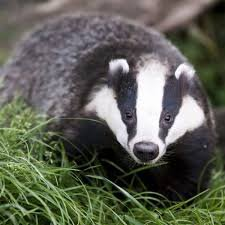

1/1 [==============================] - 0s 21ms/step
Number of similar images found: 4

Displaying similar image 1 of 4:


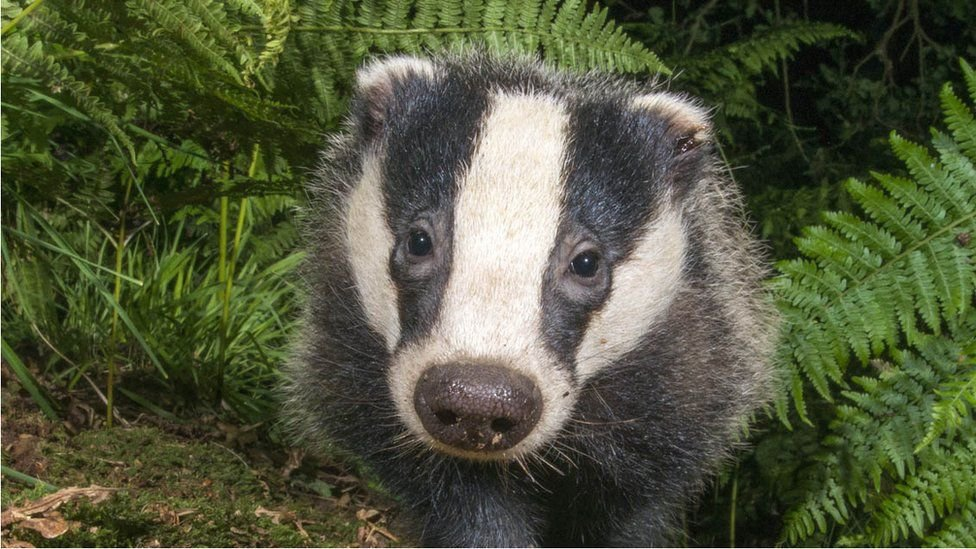


Displaying similar image 2 of 4:


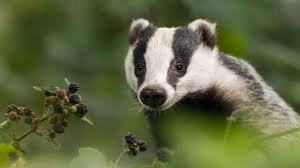


Displaying similar image 3 of 4:


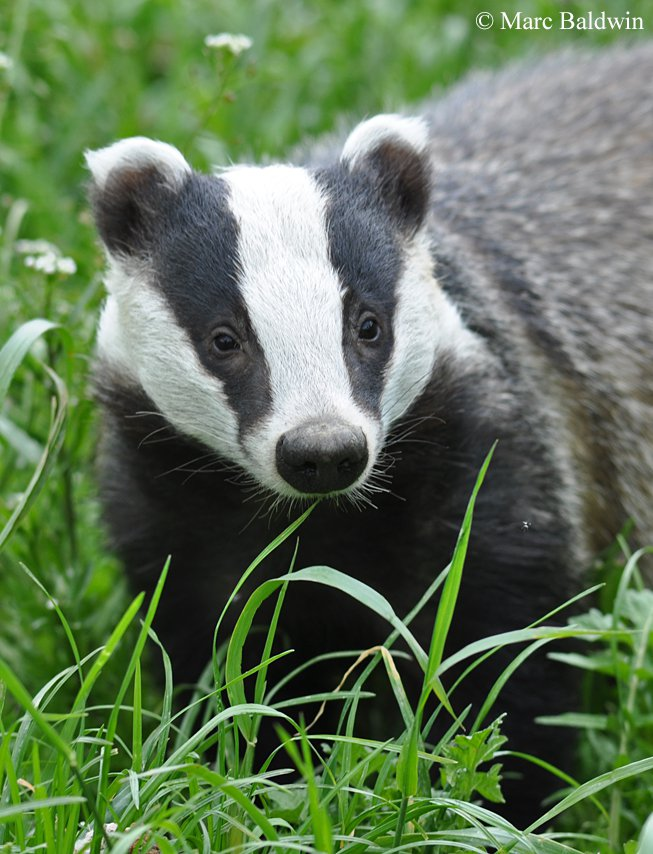


Displaying similar image 4 of 4:


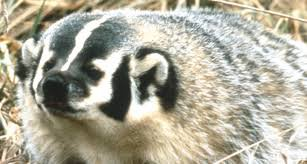


Processing query image: 039b2ae790.jpg


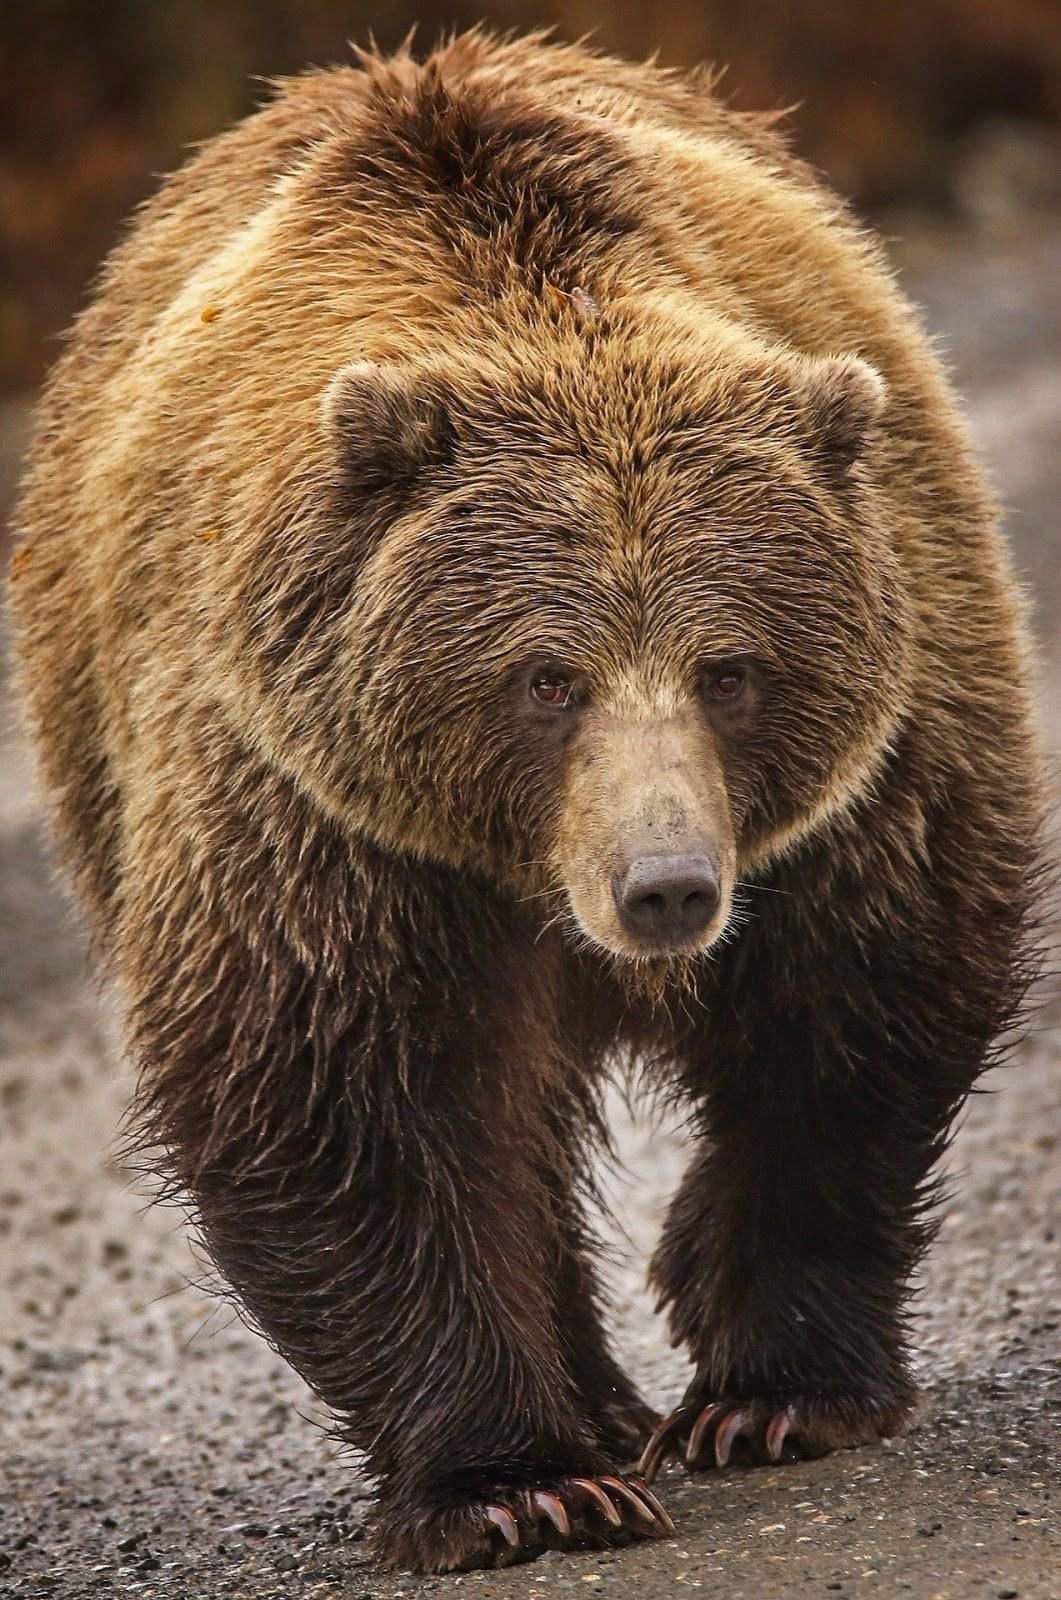

1/1 [==============================] - 0s 29ms/step
Number of similar images found: 4

Displaying similar image 1 of 4:


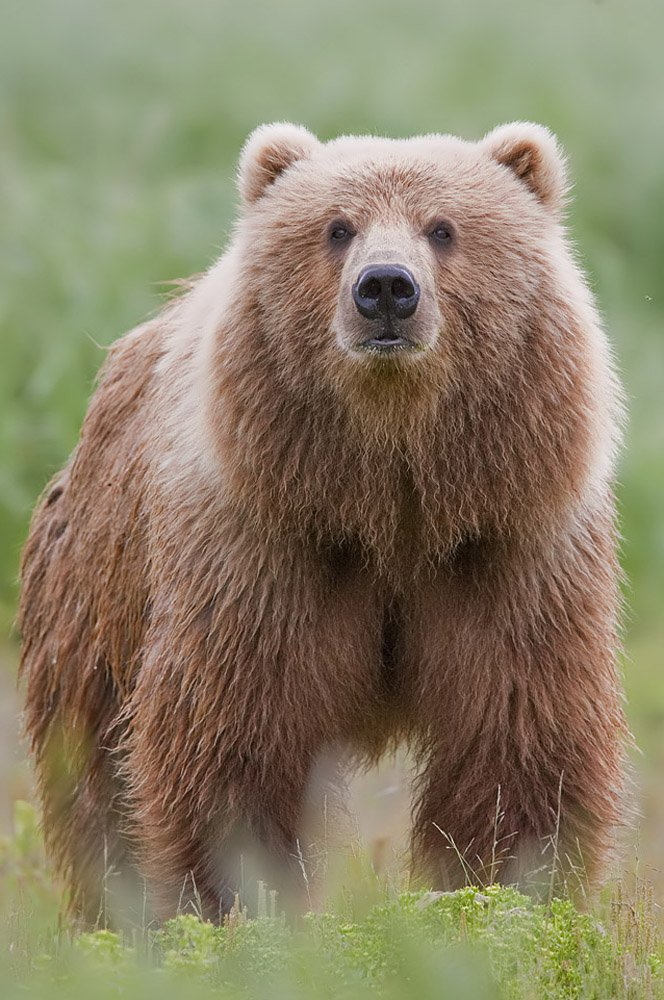


Displaying similar image 2 of 4:


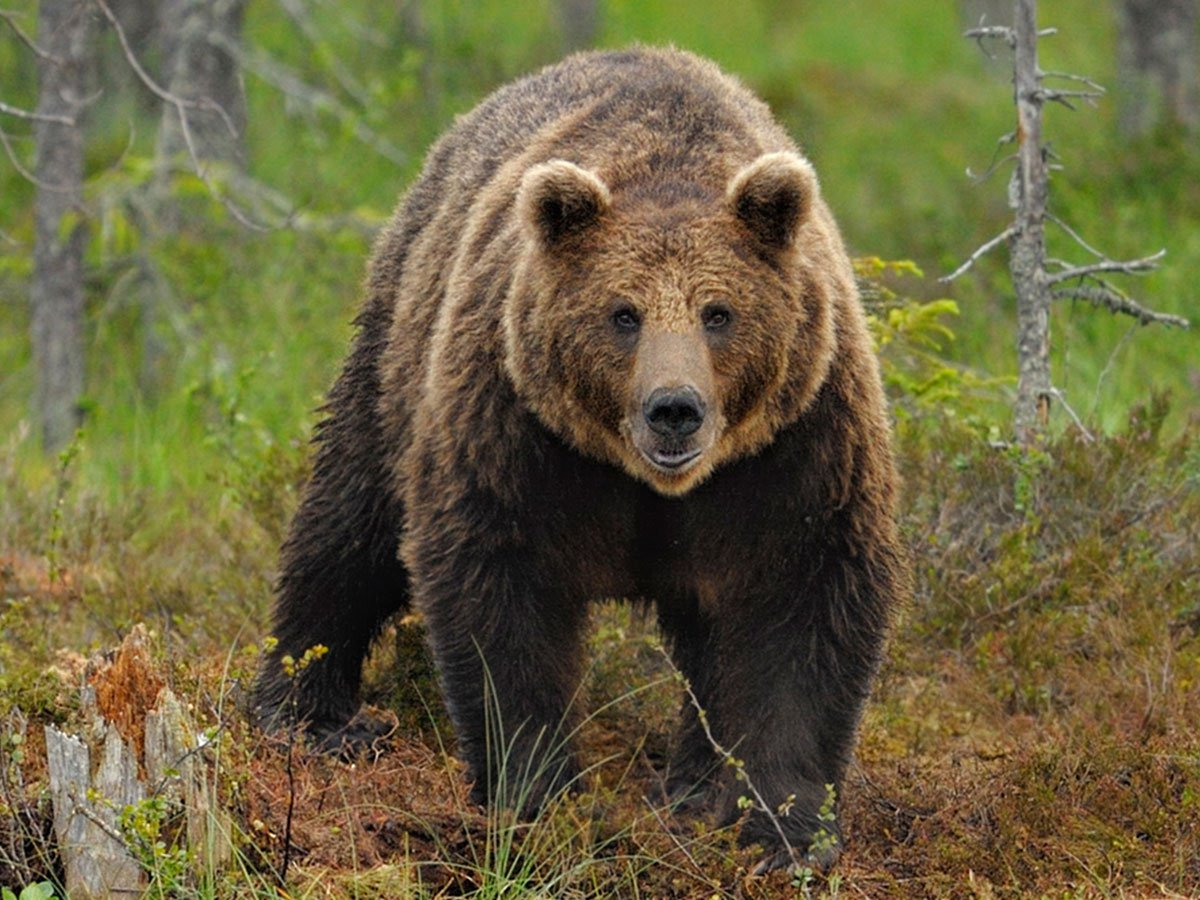


Displaying similar image 3 of 4:


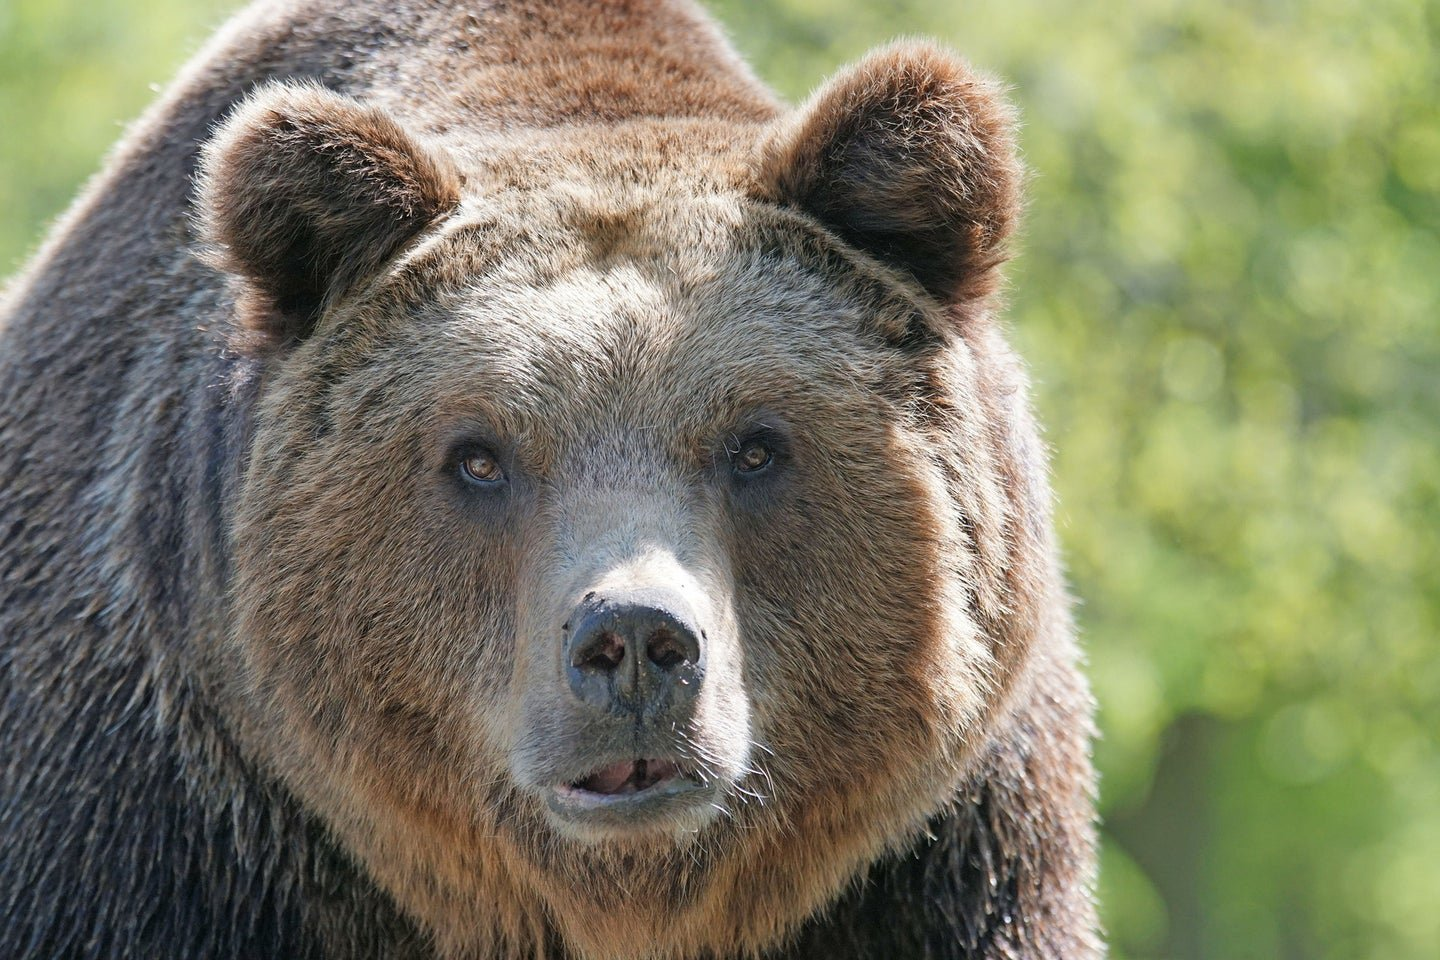


Displaying similar image 4 of 4:


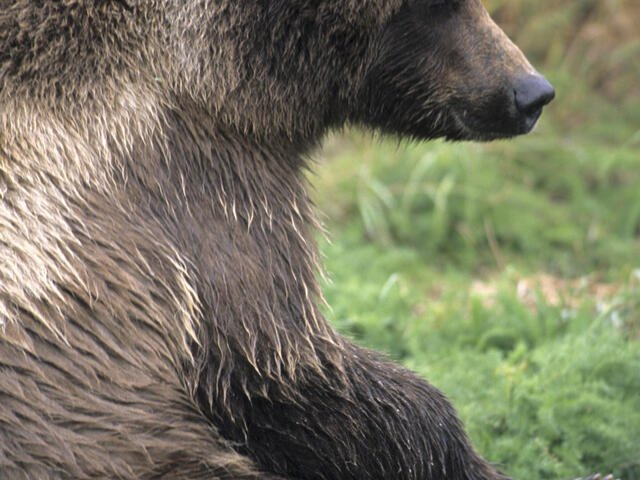


Processing query image: 37a1b4de80.jpg


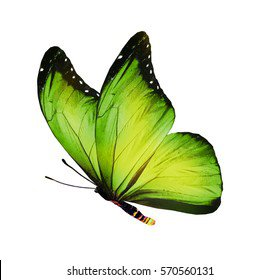

1/1 [==============================] - 0s 28ms/step
Number of similar images found: 4

Displaying similar image 1 of 4:


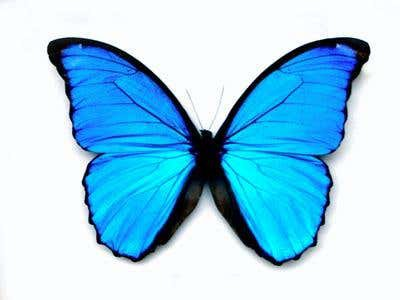


Displaying similar image 2 of 4:


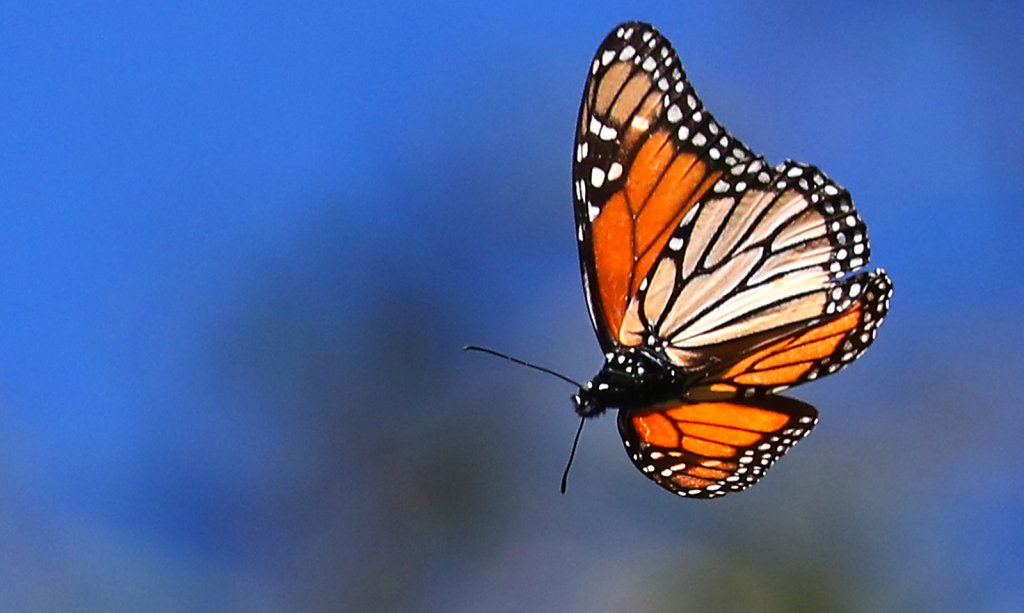


Displaying similar image 3 of 4:


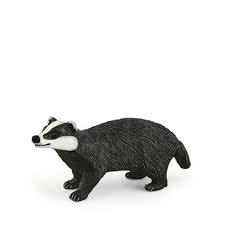


Displaying similar image 4 of 4:


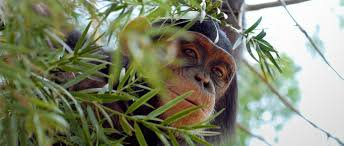


Processing query image: 3513bc5551.jpg


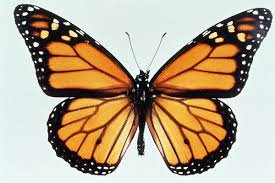

1/1 [==============================] - 0s 33ms/step
Number of similar images found: 4

Displaying similar image 1 of 4:


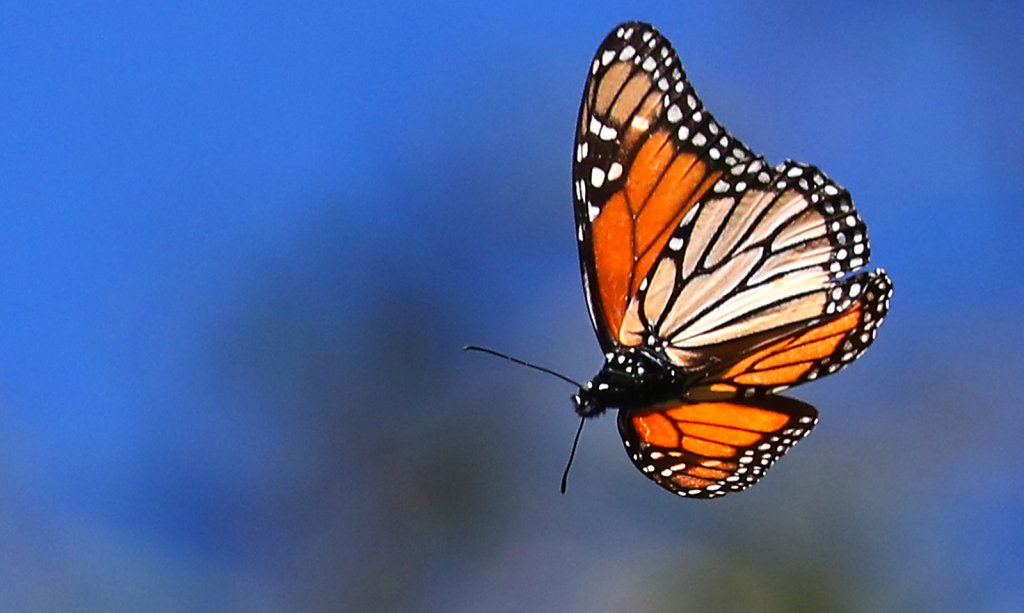


Displaying similar image 2 of 4:


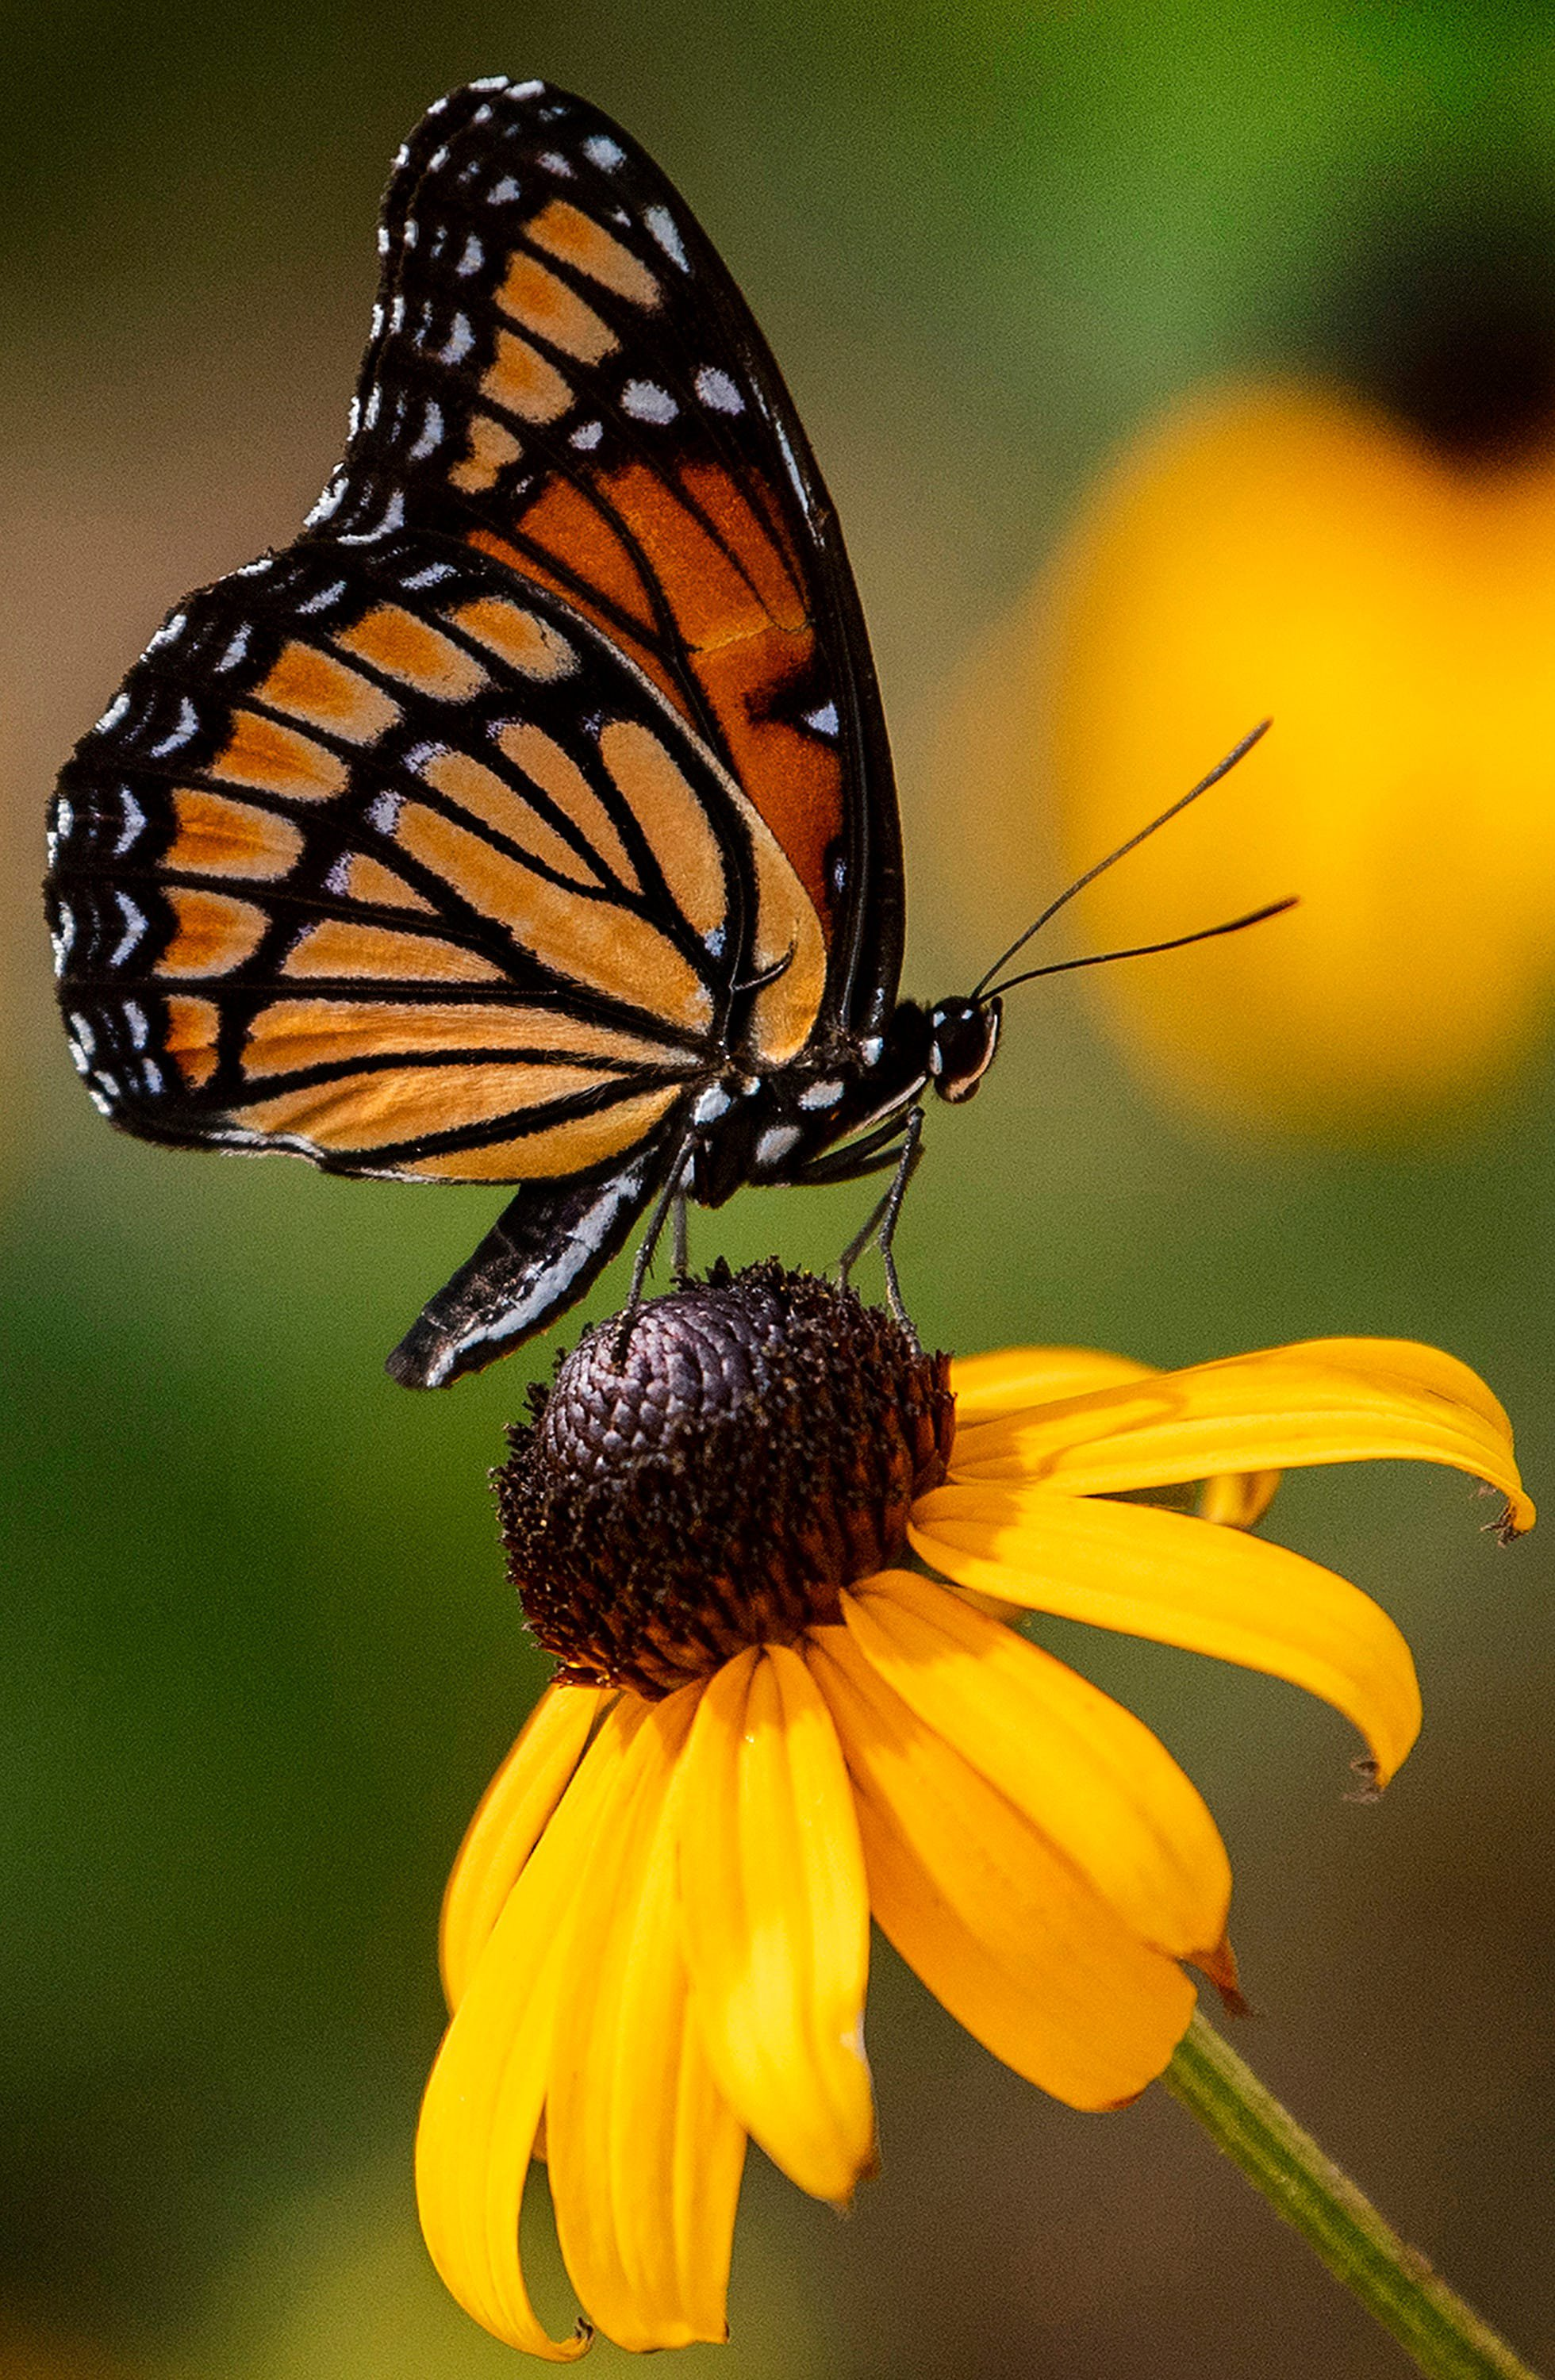


Displaying similar image 3 of 4:


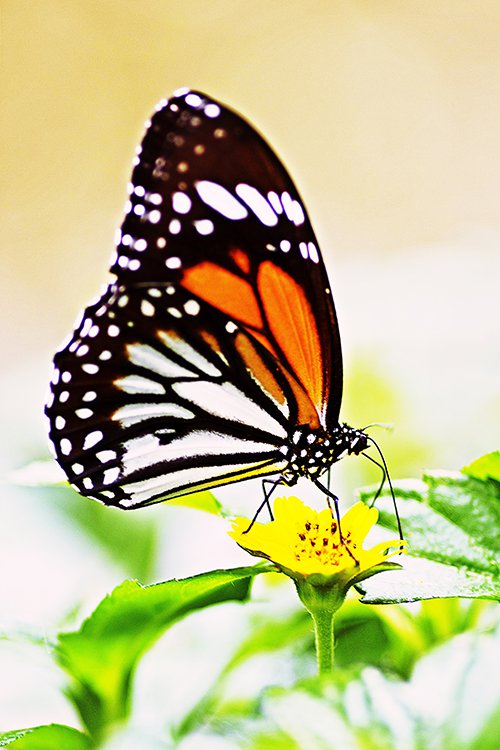


Displaying similar image 4 of 4:


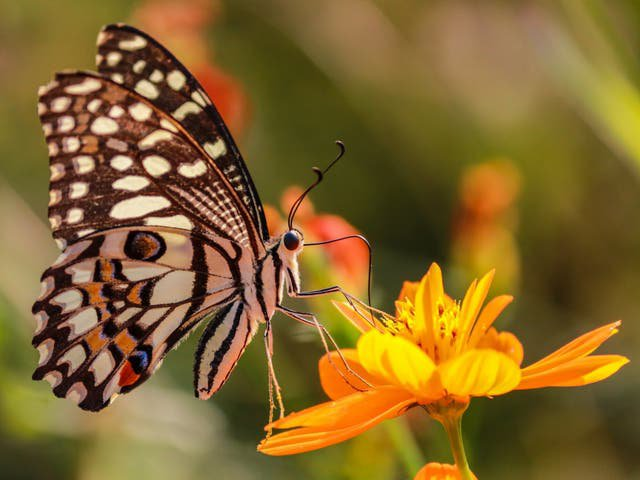


Processing query image: 97ac23148b.jpg


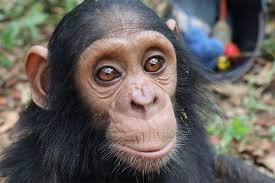

1/1 [==============================] - 0s 39ms/step
Number of similar images found: 4

Displaying similar image 1 of 4:


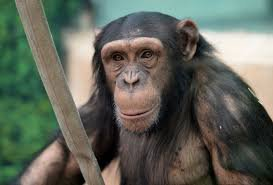


Displaying similar image 2 of 4:


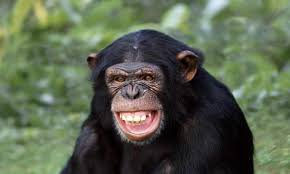


Displaying similar image 3 of 4:


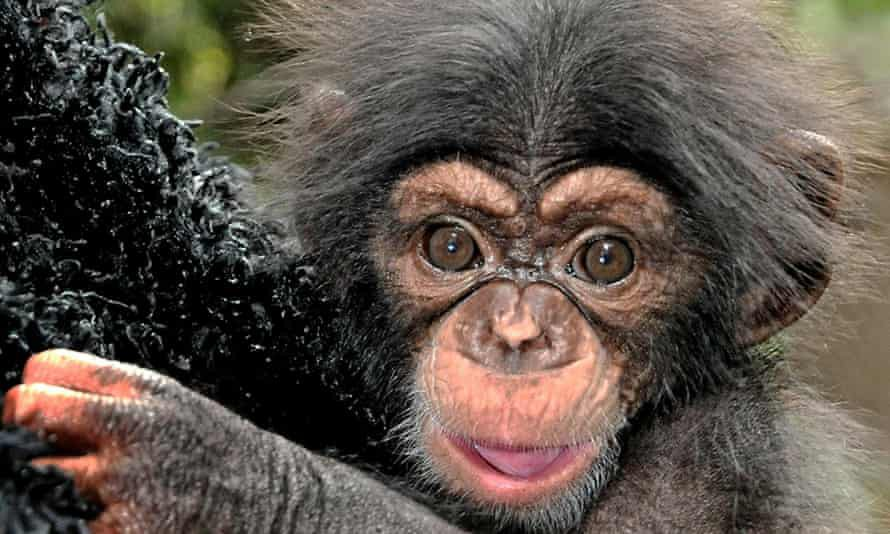


Displaying similar image 4 of 4:


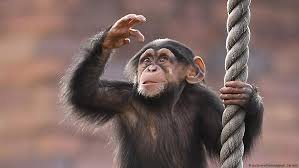


Processing query image: 0b30d5c395.jpg


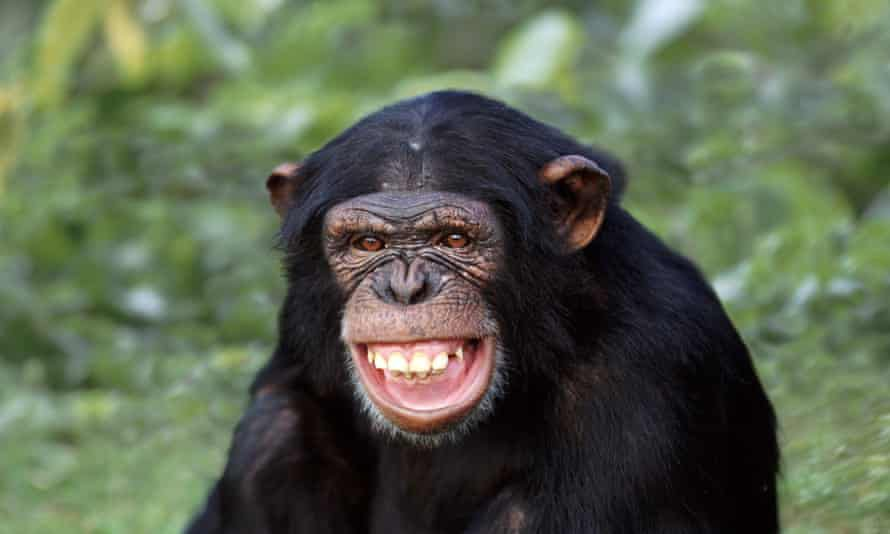

1/1 [==============================] - 0s 28ms/step
Number of similar images found: 4

Displaying similar image 1 of 4:


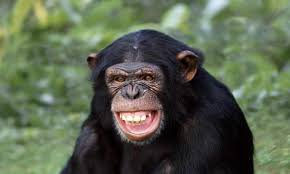


Displaying similar image 2 of 4:


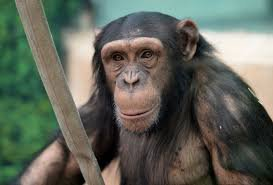


Displaying similar image 3 of 4:


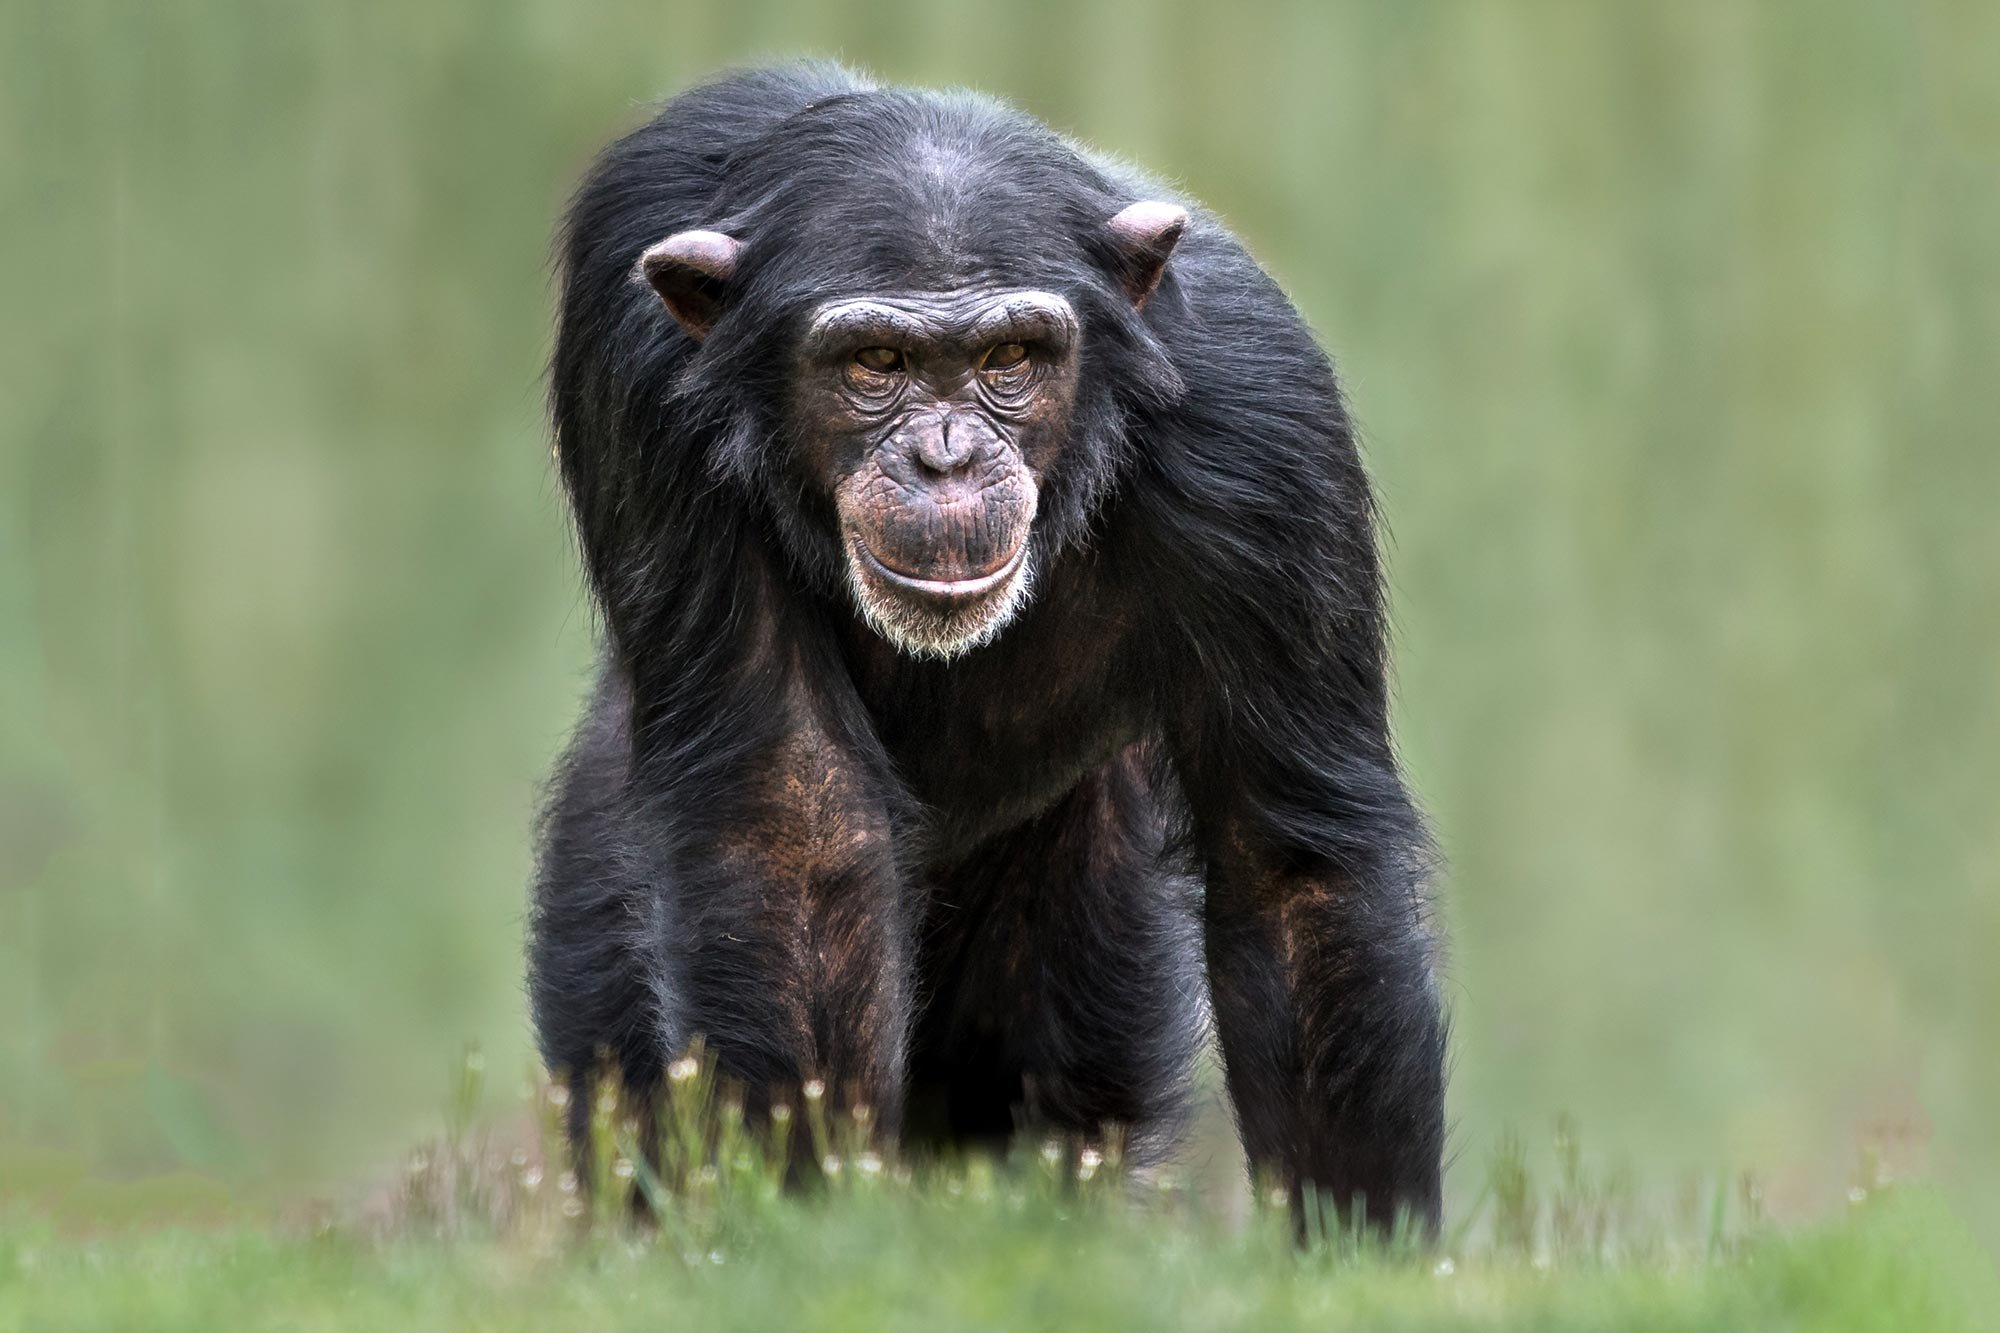


Displaying similar image 4 of 4:


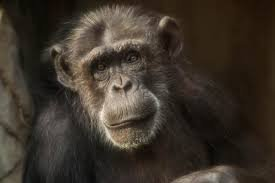


--- All Retrieval Summaries ---
The system processed the query image '1f06d5b24c.jpg' and found 4 similar images from the database. These images were displayed for comparison and review.
The system processed the query image '039b2ae790.jpg' and found 4 similar images from the database. These images were displayed for comparison and review.
The system processed the query image '37a1b4de80.jpg' and found 4 similar images from the database. These images were displayed for comparison and review.
The system processed the query image '3513bc5551.jpg' and found 4 similar images from the database. These images were displayed for comparison and review.
The system processed the query image '97ac23148b.jpg' and found 4 similar images from the database. These images were displayed for comparison and review.
The system processed the query image '0b30d5c395.jpg' and found 4 similar images from the database. These images were displayed for comparison and review.


In [42]:
# Display images from the query folder matching images from the database and print a summary for the task
from IPython.display import Image, display

# Main function to run the program
def run_image_retrieval():

    root_folder = '/content/drive/MyDrive/data_assign_2'
    query_folder = os.path.join(root_folder, "query_images")
    database_folder = os.path.join(root_folder, "images_retreival_local_database")

    feature_list = []
    image_paths_list = []
    retrieval_summaries = []  # List to hold summaries

    # Extract features for each image in the images database
    for database_img_name in os.listdir(database_folder):
        if database_img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            database_img_path = os.path.join(database_folder, database_img_name)
            extracted_features = extract_features(database_img_path, model)
            feature_list.append(extracted_features)
            image_paths_list.append(database_img_path)

    # Process each query image and retrieve similar images
    for query_img_name in os.listdir(query_folder):
        query_img_path = os.path.join(query_folder, query_img_name)
        if os.path.isfile(query_img_path):
            print(f"\nProcessing query image: {query_img_name}")
            display(Image(filename=query_img_path))  # Display the query image

            similar_images = retrieve_similar_images(query_img_path, feature_list, image_paths_list)
            num_similar_images = len(similar_images)
            print(f"Number of similar images found: {num_similar_images}")

            for idx, similar_img_path in enumerate(similar_images, 1):
                print(f"\nDisplaying similar image {idx} of {num_similar_images}:")
                display(Image(filename=similar_img_path))  # Display the similar image

            # Add a summary for this query image to the list
            retrieval_summaries.append(f"The system processed the query image '{query_img_name}' and found {num_similar_images} similar images from the database. These images were displayed for comparison and review.")

    # Print all summaries at the end
    print("\n--- All Retrieval Summaries ---")
    for summary in retrieval_summaries:
        print(summary)

# Run the program
run_image_retrieval()